## Моделирование NVT ансамбля

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Ансамбль: $NVT$;
   - Начальная температура: $T_i = 1.3~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-4}~\varepsilon / k_B$;
   - Скорость нагревания: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: $2000000$;
   - Равновесные характеристики системы рассчитывалась через каждые $100000$ шагов;
   - Число шагов на уравновешивание системы при фиксированных внешних условиях: $M=10000$;
   - Число ансамблей $N=5000$;
   - Усреднение по ансамблям при фиксированных внешних условиях: $2N-1$ шагов (к первому ансамблю относятся шаги с $1$ по $N$ шаг, ко второму - с $2$ по $N+1$ и т. д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые $N$ шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
CURRENT_DATA = '2021-09-17'
DIR_POSTFIX = '_cooling_normal_1.3_long'
PLOT_FILENAME_POSTFIX = 'long_cooling_1.3_normal'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_DATA

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data\\2021-09-17_cooling_normal_1.3_long'

In [5]:
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_PLOTS

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\plots\\2021-09-17_cooling_normal_1.3_long'

#### Параметры системы, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [6]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        setups.append(setup)
        
setups

[{'temperature': 0.0001, 'pressure': -0.84472, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84496, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84503, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84507, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84525, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84535, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84539, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84541, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84547, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84552, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84574, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84575, 'heating_velocity': 0.0004},
 {'temperature': 0.0001, 'pressure': -0.84579, 'heating_velocity': 0.0004},
 {'temperatu

#### Инициализация объекта для обработки данных и вывод таблицы значений функции радиального распределения

In [7]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.rdf.data

,radius,setup_0,setup_1,setup_2,setup_3,setup_4,setup_5,setup_6,setup_7,setup_8,...,setup_11,setup_12,setup_13,setup_14,setup_15,setup_16,setup_17,setup_18,setup_19,setup_20
0,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,6.08,0.826967,0.826200,0.826617,0.827107,0.826658,0.826683,0.826785,0.827270,0.826622,...,0.827237,0.826729,0.826689,0.854738,0.879524,0.992216,1.004022,1.003319,1.001627,1.002786
608,6.09,0.825407,0.825871,0.825348,0.825628,0.825695,0.825753,0.825279,0.824860,0.825381,...,0.825301,0.825684,0.825481,0.857521,0.869748,0.991627,1.003534,1.002378,1.002297,1.002925
609,6.10,0.862741,0.862730,0.863388,0.862897,0.862519,0.862683,0.863297,0.862862,0.862993,...,0.862779,0.863003,0.863258,0.864579,0.862470,0.990984,1.002935,1.002703,1.002786,1.002955
610,6.11,0.935520,0.936377,0.935849,0.935262,0.935932,0.935727,0.935208,0.935381,0.935460,...,0.934585,0.935798,0.935373,0.876849,0.854661,0.989630,1.002293,1.002005,1.002998,1.002493


In [8]:
pp.rdf.data.sum()

radius      1875.780000
setup_0      610.711012
setup_1      610.711784
setup_2      610.712195
setup_3      610.711140
setup_4      610.711624
setup_5      610.711516
setup_6      610.711640
setup_7      610.711909
setup_8      610.711454
setup_9      610.711818
setup_10     610.712078
setup_11     610.711963
setup_12     610.711599
setup_13     610.711576
setup_14     608.544307
setup_15     600.645280
setup_16     560.354535
setup_17     538.982708
setup_18     539.090400
setup_19     539.228576
setup_20     539.410543
dtype: float64

#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

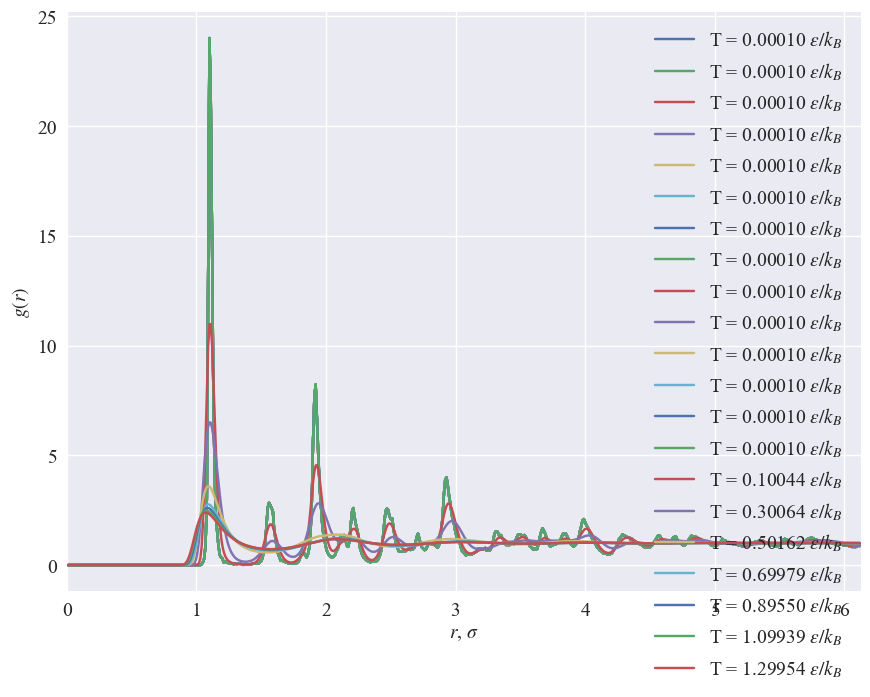

In [9]:
pp.plot_rdf(
    figsize=(10.24, 7.68),
#     shift=0.5,
    left=0,
    right=6.125,
#     bottom=0, 
#     top=20,
)

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

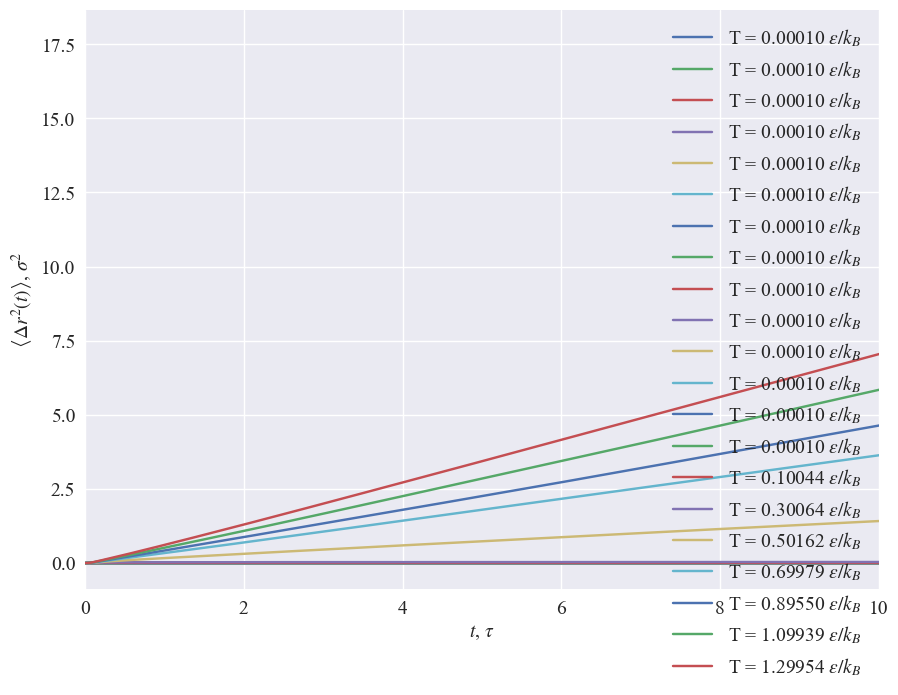

In [10]:
pp.plot_msd(
    figsize=(10.24, 7.68),
    left=0,
    right=10,
#     bottom=1e-9, 
#     top=1e2,
#     y_scale='log',
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

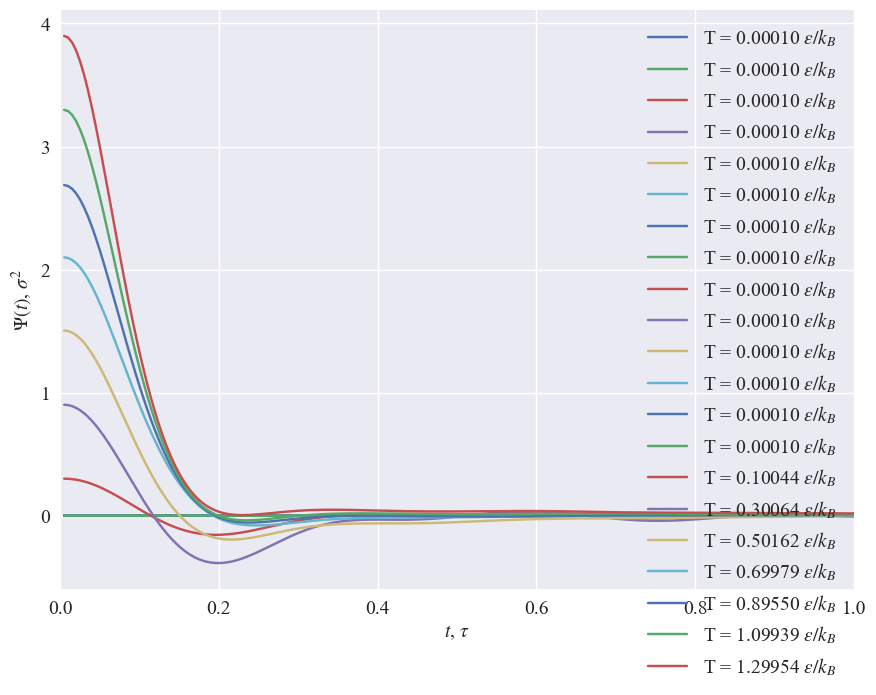

In [11]:
pp.plot_vaf(
    figsize=(10.24, 7.68),
    left=0,
    right=1,
#     bottom=-2,
#     top=10,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

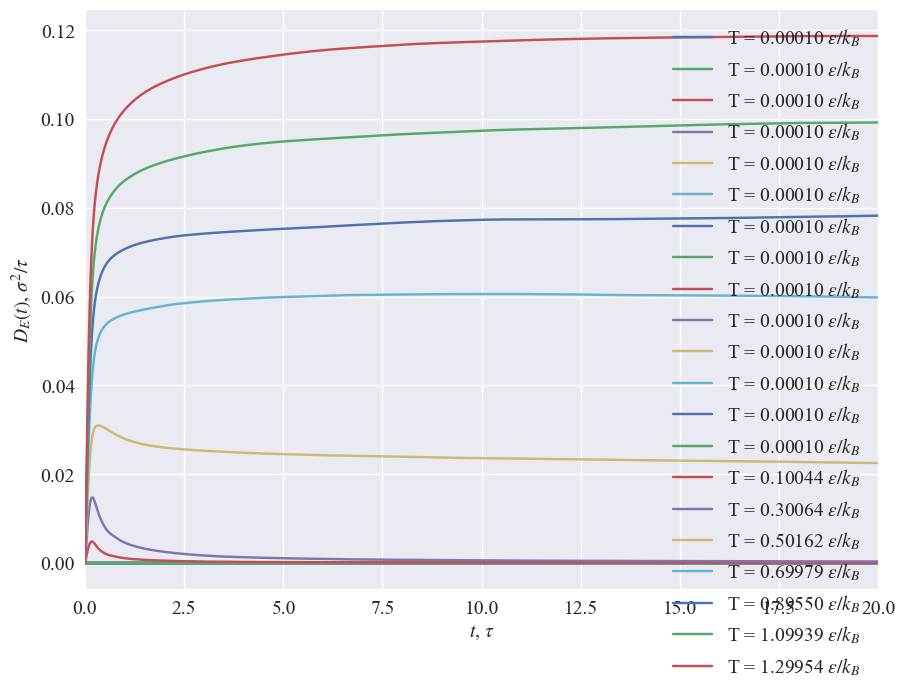

In [12]:
pp.plot_einstein_diffusion(
    figsize=(10.24, 7.68),
    left=0,
    right=20,
#     bottom=0, 
#     top=0.3,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

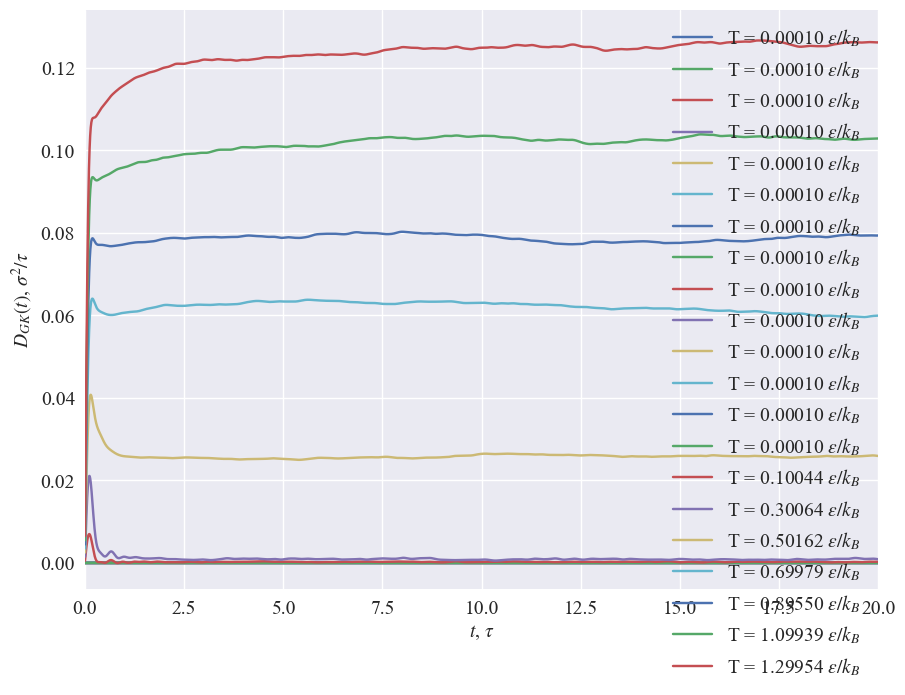

In [13]:
pp.plot_gk_diffusion(
    figsize=(10.24, 7.68),
    left=0,
    right=20,
#     bottom=0, 
#     top=0.3,
)

#### Температурная зависимость коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна

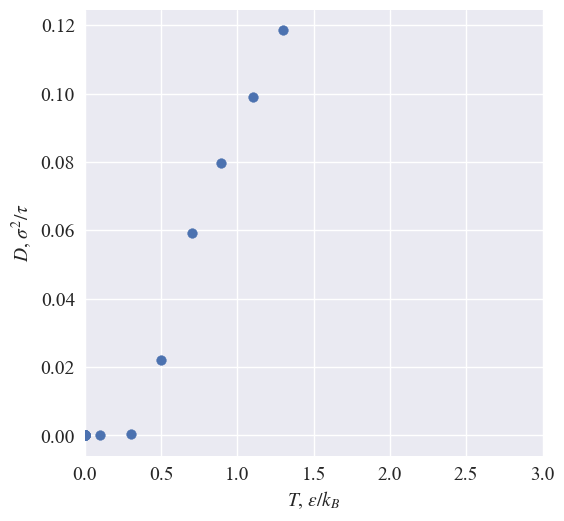

In [14]:
pp.plot_diffusion(
    figsize=(10.24, 7.68),
    left=0, 
    right=3,
#     bottom=0, 
#     top=0.3,
)

#### Таблица временных зависимостей характеристик системы

In [15]:
if 'time' not in pp.system_parameters.columns:
    pp.system_parameters['time'] = (pp.system_parameters.index + 1) * 0.005
pp.system_parameters = pp.system_parameters[39:].reset_index(drop=True)

pp.system_parameters = pp.system_parameters[pp.system_parameters['volume'] != 0.0]
pp.system_parameters

,time,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume
0,0.200,1.30330,1.55555,2678.42070,-6303.3237,-3624.9030,3221.7020,0.0,0.0,1838.2656
1,0.205,1.30243,1.55309,2674.61940,-6302.3574,-3627.7380,3215.7373,0.0,0.0,1838.2656
2,0.210,1.30150,1.55518,2670.96440,-6298.0330,-3627.0688,3234.5876,0.0,0.0,1838.2656
3,0.215,1.30078,1.56062,2668.75540,-6291.4585,-3622.7031,3269.0066,0.0,0.0,1838.2656
4,0.220,1.30060,1.56700,2668.78960,-6284.9077,-3616.1182,3304.0908,0.0,0.0,1838.2656
...,...,...,...,...,...,...,...,...,...,...
1999956,9999.980,0.00010,-0.84542,0.20617,-9939.1820,-9938.9760,-4662.7393,0.0,0.0,1838.2656
1999957,9999.985,0.00010,-0.84537,0.20200,-9939.1770,-9938.9750,-4662.4380,0.0,0.0,1838.2656
1999958,9999.990,0.00010,-0.84533,0.20609,-9939.1460,-9938.9400,-4662.2456,0.0,0.0,1838.2656
1999959,9999.995,0.00010,-0.84540,0.20195,-9939.2030,-9939.0010,-4662.6040,0.0,0.0,1838.2656


#### Зависимость объёма системы от времени

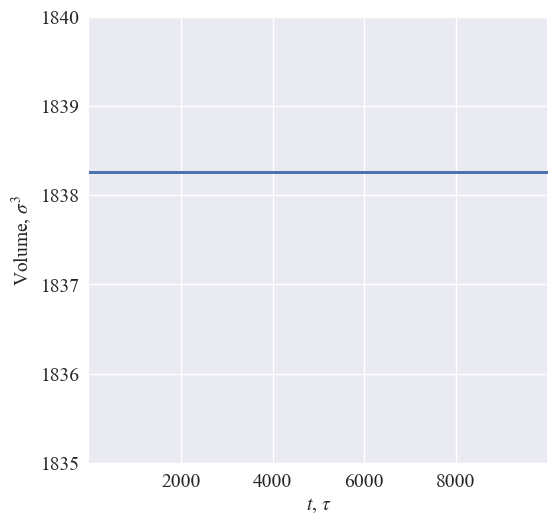

In [16]:
pp.plot_system_parameters(
    column_names=['volume',],
    y_label=r'Volume, $\sigma ^ 3$',
    bottom=1835,
    top=1840,
);

#### Зависимость температуры системы от времени

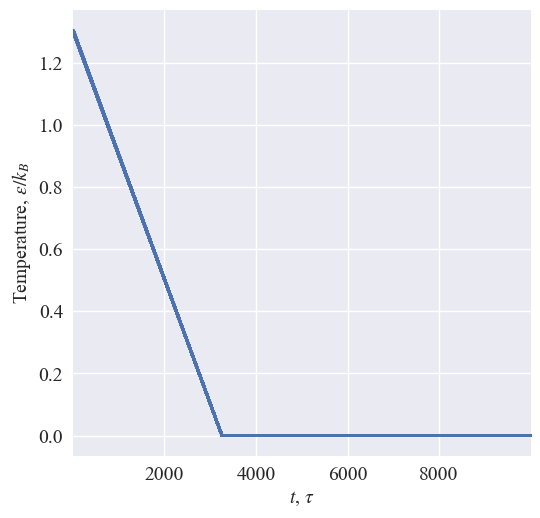

In [17]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
#     bottom=1.0,
#     top=1.5,
);

#### Зависимость давления системы от времени

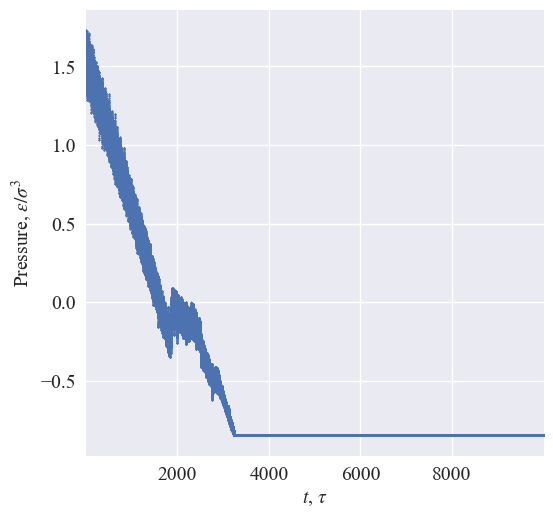

In [18]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
#     bottom=-3,
#     top=5,
);

#### Зависимость кинетической, потенциальной  и полной (внутренней) энергии системы от времени

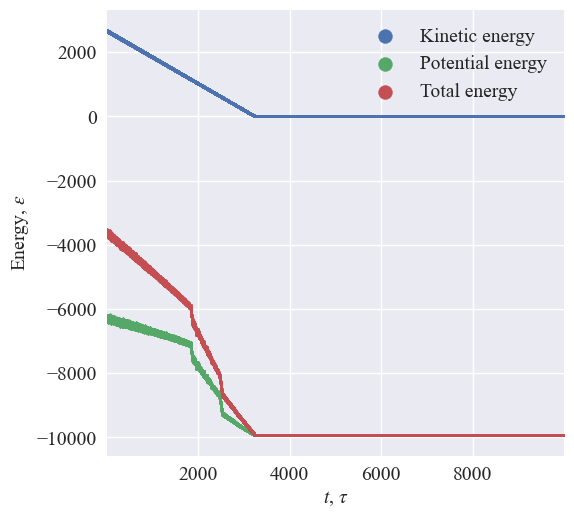

In [19]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
#     bottom=-10000,
#     top=8000,
    file_name_prefix='all_energies',
);

#### Вычисление термодинамических функций

In [20]:
pp.get_enthalpy();
pp.system_parameters.enthalpy

0              0.000000
1             -7.357133
2             -2.845958
3             11.519907
4             29.832941
               ...     
1999956   -10727.693558
1999957   -10727.600644
1999958   -10727.492114
1999959   -10727.681792
1999960   -10727.549879
Name: enthalpy, Length: 1999961, dtype: float64

In [21]:
pp.get_entropy();
pp.system_parameters.entropy

0              0.000000
1             -2.176700
2             -1.662525
3              1.693693
4              6.756663
               ...     
1999956   -43168.660007
1999957   -43158.660007
1999958   -42808.660007
1999959   -43418.660007
1999960   -43018.660007
Name: entropy, Length: 1999961, dtype: float64

In [22]:
pp.get_free_energy();
pp.system_parameters.free_energy

0             0.000000
1            -0.001894
2            -0.003440
3            -0.002220
4            -0.001004
              ...     
1999956   -6345.162521
1999957   -6345.162521
1999958   -6345.162521
1999959   -6345.162521
1999960   -6345.162521
Name: free_energy, Length: 1999961, dtype: float64

In [23]:
pp.get_gibbs_energy();
pp.system_parameters.gibbs_energy

0              0.000000
1             -4.524027
2             -0.683598
3              9.317786
4             21.047137
               ...     
1999956   -10758.783078
1999957   -10758.691165
1999958   -10758.617634
1999959   -10758.746313
1999960   -10758.654400
Name: gibbs_energy, Length: 1999961, dtype: float64

In [24]:
pp.system_parameters

,time,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume,enthalpy,entropy,free_energy,gibbs_energy
0,0.200,1.30330,1.55555,2678.42070,-6303.3237,-3624.9030,3221.7020,0.0,0.0,1838.2656,0.000000,0.000000,0.000000,0.000000
1,0.205,1.30243,1.55309,2674.61940,-6302.3574,-3627.7380,3215.7373,0.0,0.0,1838.2656,-7.357133,-2.176700,-0.001894,-4.524027
2,0.210,1.30150,1.55518,2670.96440,-6298.0330,-3627.0688,3234.5876,0.0,0.0,1838.2656,-2.845958,-1.662525,-0.003440,-0.683598
3,0.215,1.30078,1.56062,2668.75540,-6291.4585,-3622.7031,3269.0066,0.0,0.0,1838.2656,11.519907,1.693693,-0.002220,9.317786
4,0.220,1.30060,1.56700,2668.78960,-6284.9077,-3616.1182,3304.0908,0.0,0.0,1838.2656,29.832941,6.756663,-0.001004,21.047137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999956,9999.980,0.00010,-0.84542,0.20617,-9939.1820,-9938.9760,-4662.7393,0.0,0.0,1838.2656,-10727.693558,-43168.660007,-6345.162521,-10758.783078
1999957,9999.985,0.00010,-0.84537,0.20200,-9939.1770,-9938.9750,-4662.4380,0.0,0.0,1838.2656,-10727.600644,-43158.660007,-6345.162521,-10758.691165
1999958,9999.990,0.00010,-0.84533,0.20609,-9939.1460,-9938.9400,-4662.2456,0.0,0.0,1838.2656,-10727.492114,-42808.660007,-6345.162521,-10758.617634
1999959,9999.995,0.00010,-0.84540,0.20195,-9939.2030,-9939.0010,-4662.6040,0.0,0.0,1838.2656,-10727.681792,-43418.660007,-6345.162521,-10758.746313


#### Зависимость энтропии системы от времени

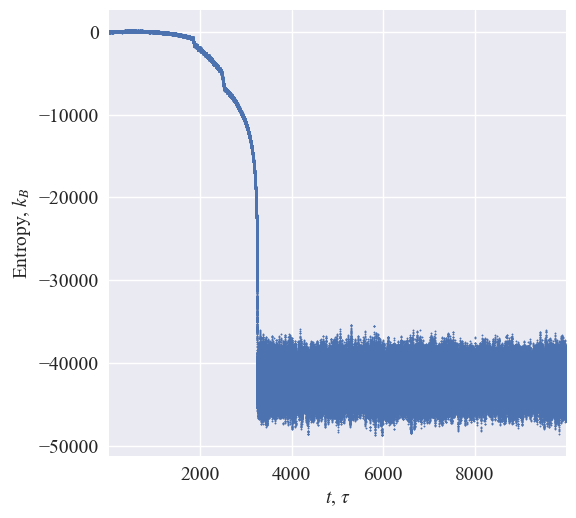

In [25]:
pp.plot_system_parameters(
    column_names=['entropy', ],
    y_label=r'Entropy, $k_B$',
#     bottom=-2,
#     top=2,
);

#### Зависимость энтальпии, внутренней энергии, свободной энергии Гельмгольца и энергии Гиббса от времени

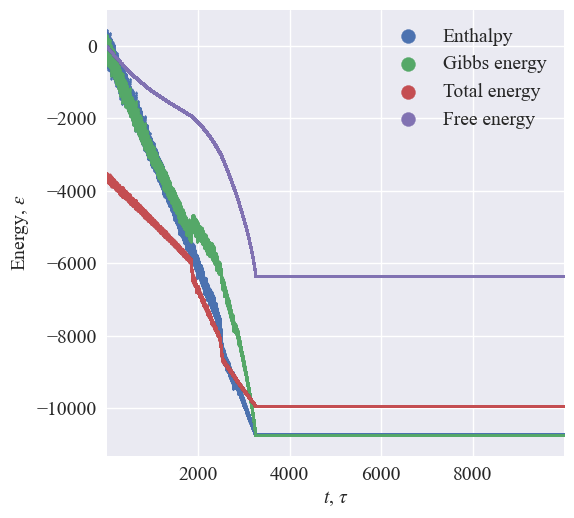

In [26]:
pp.plot_system_parameters(
    column_names=[
        'enthalpy', 
        'gibbs_energy', 
        'total_energy', 
        'free_energy',
    ],
    y_label=r'Energy, $\epsilon$',
    file_name_prefix='all_thermodynamic_functions',
#     bottom=100,
#     top=2000,
);

#### Зависимость внутренней энергии системы от энтропии

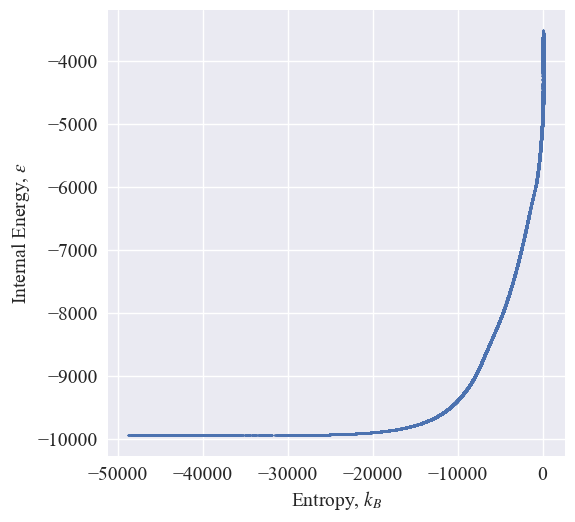

In [27]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['total_energy'], s=1);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость внутренней энергии системы от объёма

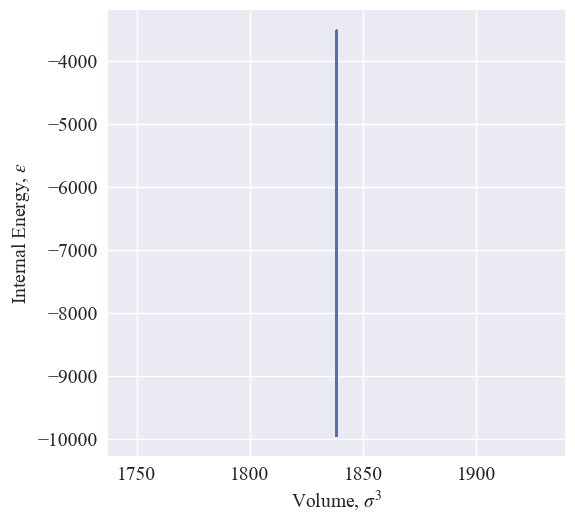

In [28]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['total_energy'], s=1);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от энтропии

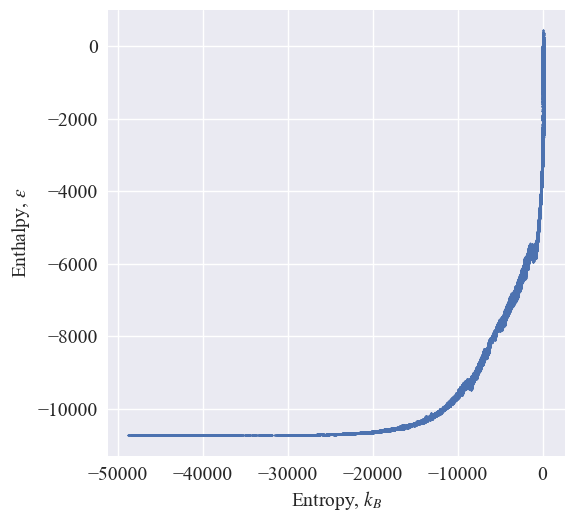

In [29]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['enthalpy'], s=1);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от давления

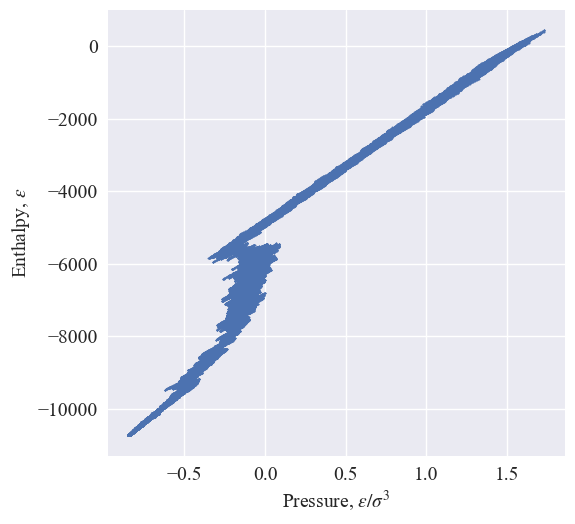

In [30]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['enthalpy'], s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Enthalpy, $\epsilon$')
plt.show();

#### Зависимость свободной энергии Гельмгольца от объёма системы

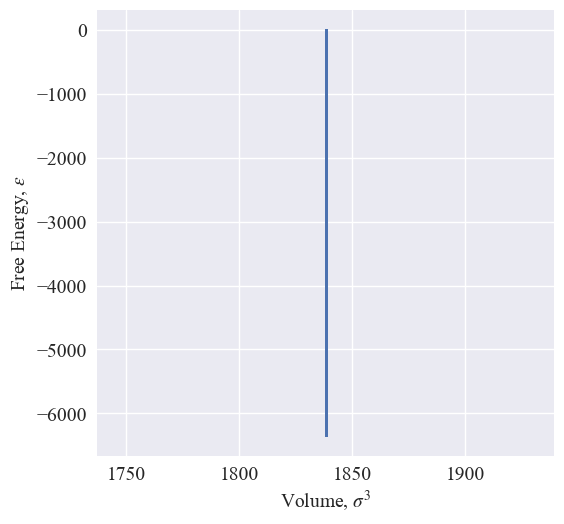

In [31]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['free_energy'], s=1);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость свободной энергии Гельмгольца от температуры системы

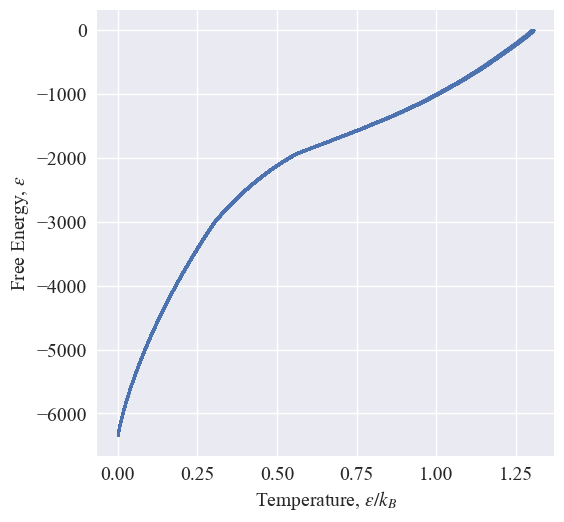

In [32]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['free_energy'], s=1);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от температуры системы

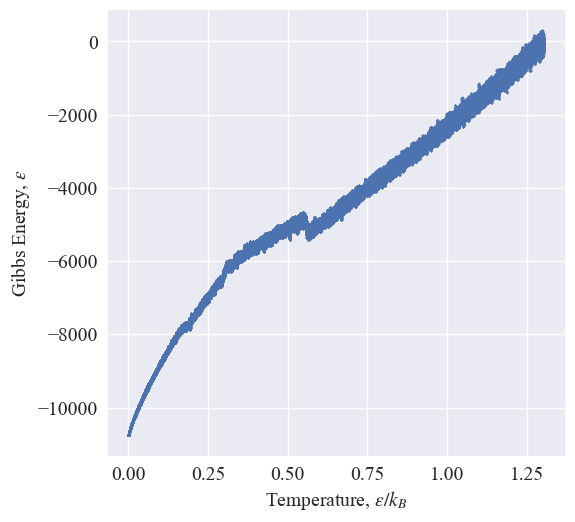

In [33]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['gibbs_energy'], s=1);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от давления системы

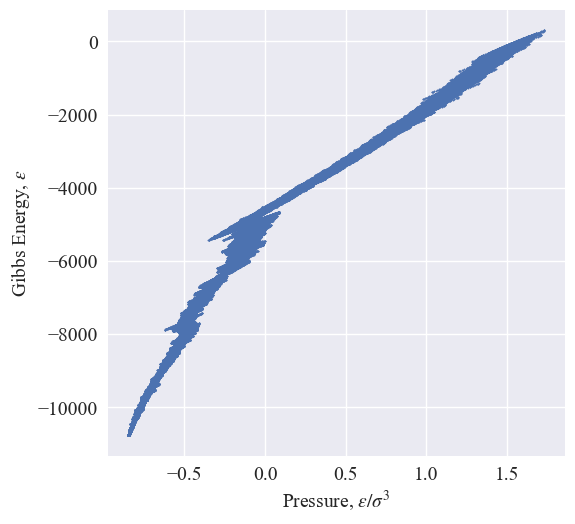

In [34]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['gibbs_energy'], s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

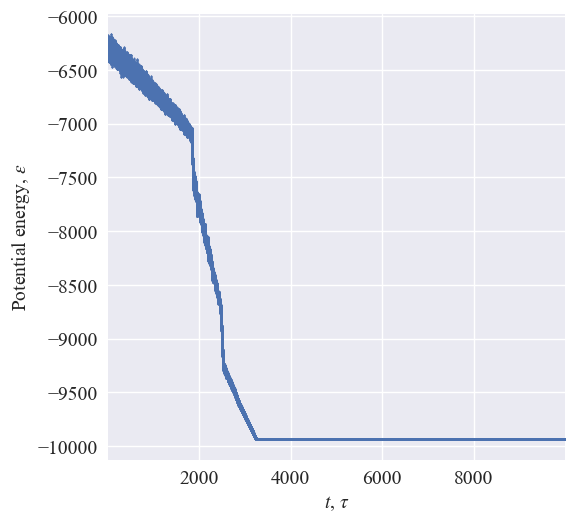

In [35]:
pp.plot_system_parameters(
    column_names=['potential_energy',],
    y_label=r'Potential energy, $\epsilon$',
);